<a href="https://colab.research.google.com/github/BigDataAnalytics-Group-B/comp3610-Project-Group-B/blob/Jar/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_excel('HR_Employee_Data.xlsx')

df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Cleaning

In [36]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [37]:
# Handle categorical variables: 'Department' and 'salary'
df = pd.get_dummies(df, columns=['Department', 'salary'])

df.dropna(inplace=True)
df = df.drop(['Emp_Id'], axis=1)

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


(14999,)


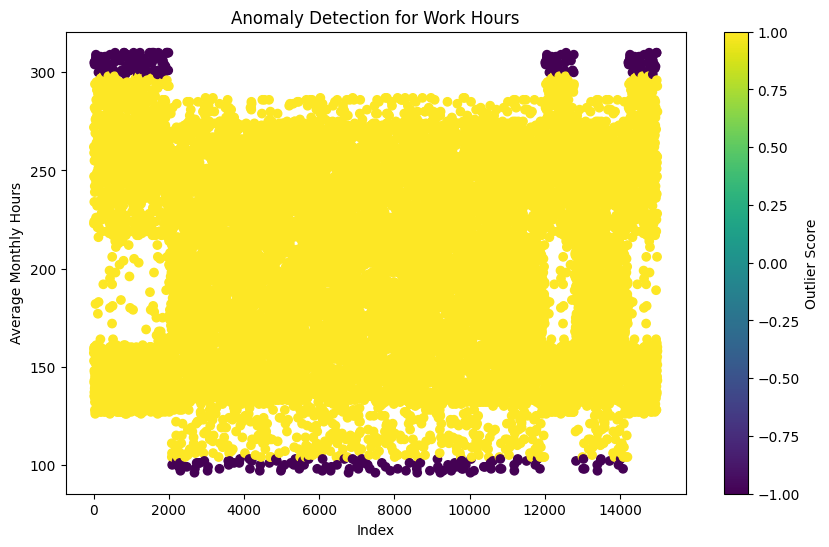

DataFrame of Rows with Anomalies:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
11,0.11,0.81,6,305,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
22,0.09,0.95,6,304,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
38,0.11,0.89,6,306,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
54,0.10,0.92,7,307,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
57,0.10,0.81,6,309,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14912,0.11,0.80,6,304,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
14929,0.10,0.83,7,302,5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14946,0.10,0.84,5,303,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14972,0.11,0.97,6,310,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
from sklearn.ensemble import IsolationForest

# Load the dataset excerpt
data = df

print(data['average_montly_hours'].shape)
# Select the feature for anomaly detection (work hours)
work_hours = data['average_montly_hours'].values.reshape(-1, 1)

# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.02)  # Contamination represents the expected proportion of outliers
model.fit(work_hours)

# Predict outliers/anomalies
outliers = model.predict(work_hours)

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(range(len(work_hours)), work_hours, c=outliers, cmap='viridis')
plt.xlabel('Index')
plt.ylabel('Average Monthly Hours')
plt.title('Anomaly Detection for Work Hours')
plt.colorbar(label='Outlier Score')
plt.show()

# Print the indices of detected anomalies
anomaly_indices = data.index[outliers == -1]
# print("Indices of detected anomalies:", anomaly_indices)

# Filter the original DataFrame to include only rows with anomalies
anomaly_df = data.iloc[anomaly_indices]

# Display the DataFrame of rows with anomalies
print("DataFrame of Rows with Anomalies:")
anomaly_df

InterQuartile Range

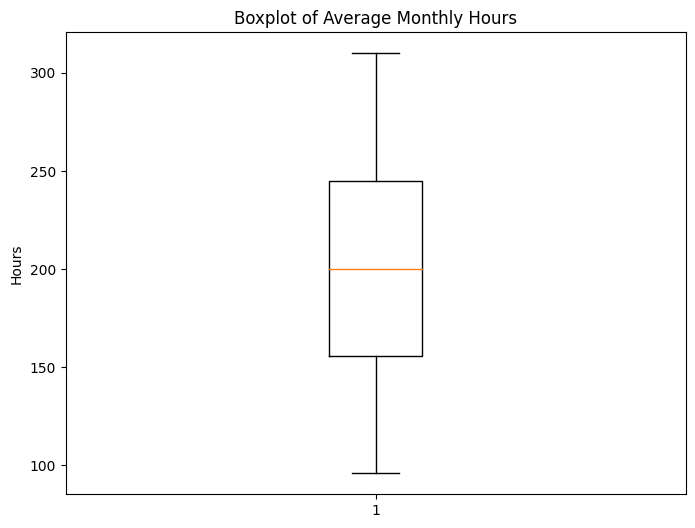

Outliers Detected:
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, Department_IT, Department_RandD, Department_accounting, Department_hr, Department_management, Department_marketing, Department_product_mng, Department_sales, Department_support, Department_technical, salary_high, salary_low, salary_medium]
Index: []

[0 rows x 21 columns]


In [39]:
# Plot boxplot for 'average_montly_hours'
plt.figure(figsize=(8, 6))
plt.boxplot(df['average_montly_hours'])
plt.title('Boxplot of Average Monthly Hours')
plt.ylabel('Hours')
plt.show()

# Calculate IQR
Q1 = df['average_montly_hours'].quantile(0.25)
Q3 = df['average_montly_hours'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outliers
threshold = 1.5

# Detect outliers using IQR method
outliers = df[(df['average_montly_hours'] < (Q1 - threshold * IQR)) | (df['average_montly_hours'] > (Q3 + threshold * IQR))]

print("Outliers Detected:")
print(outliers)

# Calculate Z-Score

In [63]:
# Drop non-numeric columns if any
numeric_df = df['average_montly_hours']

# Calculate mean and standard deviation
mean = numeric_df.mean()
std_dev = numeric_df.std()

# Calculate Z-scores
Z_scores = (numeric_df - mean) / std_dev

# Display the Z-scores DataFrame
print(Z_scores)

0       -0.882010
1        1.220382
2        1.420610
3        0.439493
4       -0.841965
           ...   
14994   -1.002147
14995   -0.821942
14996   -1.162329
14997    1.580792
14998   -0.861988
Name: average_montly_hours, Length: 14999, dtype: float64


In [57]:
# Define the threshold for anomaly detection (e.g., Z-score of 2 or -2)
threshold = 2 # You can adjust this threshold based on your specific requirements

# Detect anomalies based on the threshold
anomalies = numeric_df[abs(Z_scores) > threshold]
filtered_abnormalities = anomalies.dropna(how='all')

# Display the anomalies
print("Anomalies:")
print(filtered_abnormalities)

Anomalies:
11       305
22       304
38       306
54       307
57       309
        ... 
14912    304
14929    302
14946    303
14972    310
14975    310
Name: average_montly_hours, Length: 248, dtype: int64


In [66]:
# Get the total number of data points in the dataset
total_data_points = numeric_df.shape[0]  # Number of rows in the DataFrame

# Get the number of anomalies after filtering
num_anomalies = filtered_abnormalities.shape[0]  # Number of rows in the DataFrame

# Calculate the ratio of anomalies to the total number of data points
anomaly_ratio = num_anomalies / total_data_points

# Display the comparison
print("Number of anomalies:", num_anomalies)
print("Total number of data points:", total_data_points)
print("Ratio of anomalies to total data points:", anomaly_ratio)

Number of anomalies: 248
Total number of data points: 14999
Ratio of anomalies to total data points: 0.016534435629041937


In [72]:
# Assuming 'anomalies_df' contains the anomalies detected and shares the same index as 'df'
all_anomalies = df[df.index.isin(filtered_abnormalities.index)]
all_anomalies.shape


(248, 21)

In [82]:
all_anomalies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
11,0.11,0.81,6,305,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
22,0.09,0.95,6,304,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
38,0.11,0.89,6,306,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
54,0.10,0.92,7,307,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
57,0.10,0.81,6,309,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14912,0.11,0.80,6,304,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
14929,0.10,0.83,7,302,5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14946,0.10,0.84,5,303,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14972,0.11,0.97,6,310,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


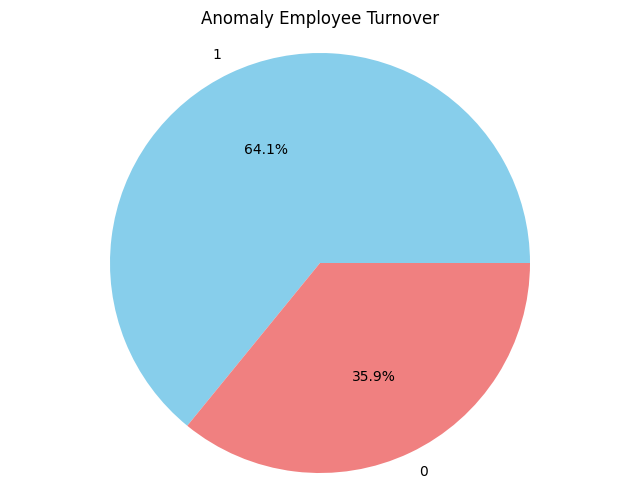

In [74]:
# Count the occurrences of each category in the 'left' column
left_counts = all_anomalies['left'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(left_counts, labels=left_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Anomaly Employee Turnover')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

We can observe that 64.1% of the people that work abnormal working hours in the company has left the company leading to high employee turnover.

In [85]:
anomaly = df.copy()
anomaly['anomaly'] = 0

for index in all_anomalies.index:
    anomaly.at[index, 'anomaly'] = 1
anomaly.head(5)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium,anomaly
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [87]:
# Count the number of rows where 'anomaly' is equal to 1
num_anomalies = (anomaly['anomaly'] == 1).sum()

print("Number of rows that are anomalies:", num_anomalies)

Number of rows that are anomalies: 248


In [105]:
print(anomaly[['left', 'anomaly']].describe())
# Calculate the correlation between 'left' and 'anomaly'
correlation = anomaly['anomaly'].corr(anomaly['left'])
print("Correlation between 'left' and 'anomaly':", correlation)


               left       anomaly
count  14999.000000  14999.000000
mean       0.238083      0.016534
std        0.425924      0.127523
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Correlation between 'left' and 'anomaly': 0.12270224820776794
